X.shape: (26, 2)


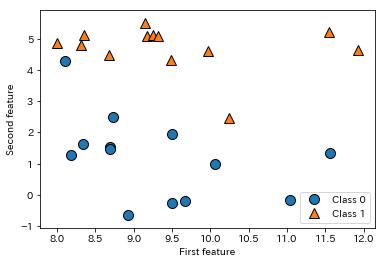

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
from IPython.display import display

# データ・セット
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


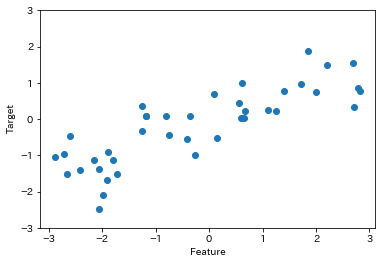

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [18]:
print("Shape of cancer data: {}".format(cancer.data.shape))
# 30の特徴量を持つ569個のデータポイント

Shape of cancer data: (569, 30)


In [20]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 良性: 212 , 悪性: 357

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [21]:
print("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [23]:
print("DESCR: \n{}".format(cancer.DESCR))

DESCR: 
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.



In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))


Data shape: (506, 13)


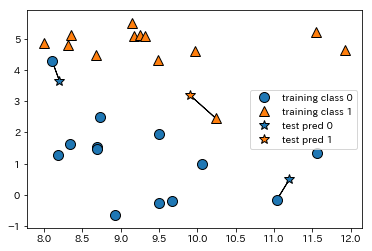

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

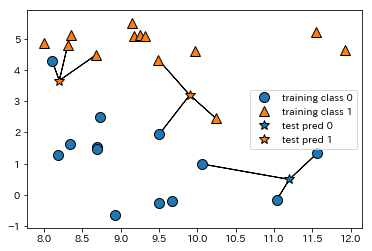

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [35]:
from sklearn.tree import export_graphviz
import graphviz

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

w[0]: 0.393906  b: -0.031804


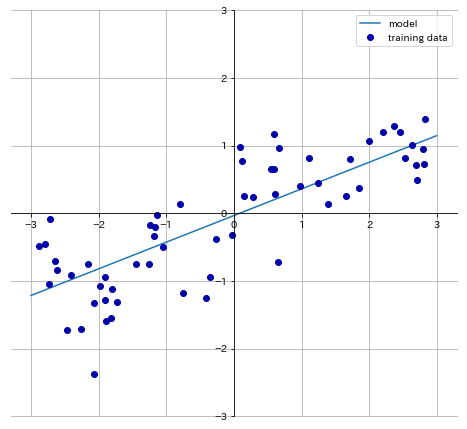

In [40]:
mglearn.plots.plot_linear_regression_wave()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer

X, y = mglearn.datasets.make_forge()

cancer = load_breast_cancer()

#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
#X,y = mglearn.datasets.make_wave(n_samples=60)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [67]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]


In [69]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.92


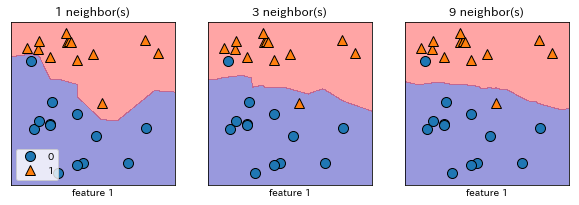

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
axes[0].legend(loc=3)


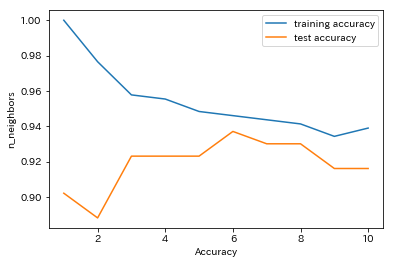

In [74]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    #訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()


In [76]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.70


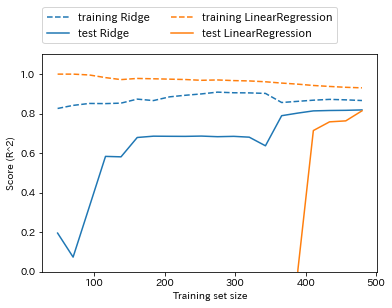

In [77]:
mglearn.plots.plot_ridge_n_samples()

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.563702
Test set score: 0.50
Number of feature used: 2


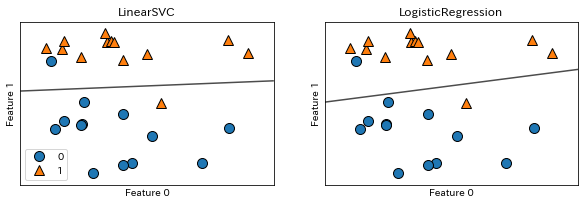

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, ax=ax, eps=0.5, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()

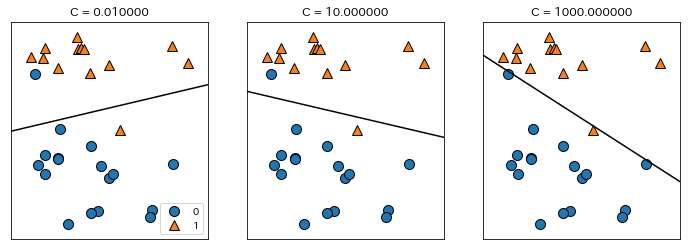

In [87]:
mglearn.plots.plot_linear_svc_regularization()

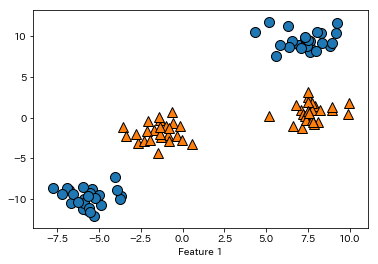

In [88]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")


In [93]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set : {:3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set : 0.937063


In [96]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot",
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

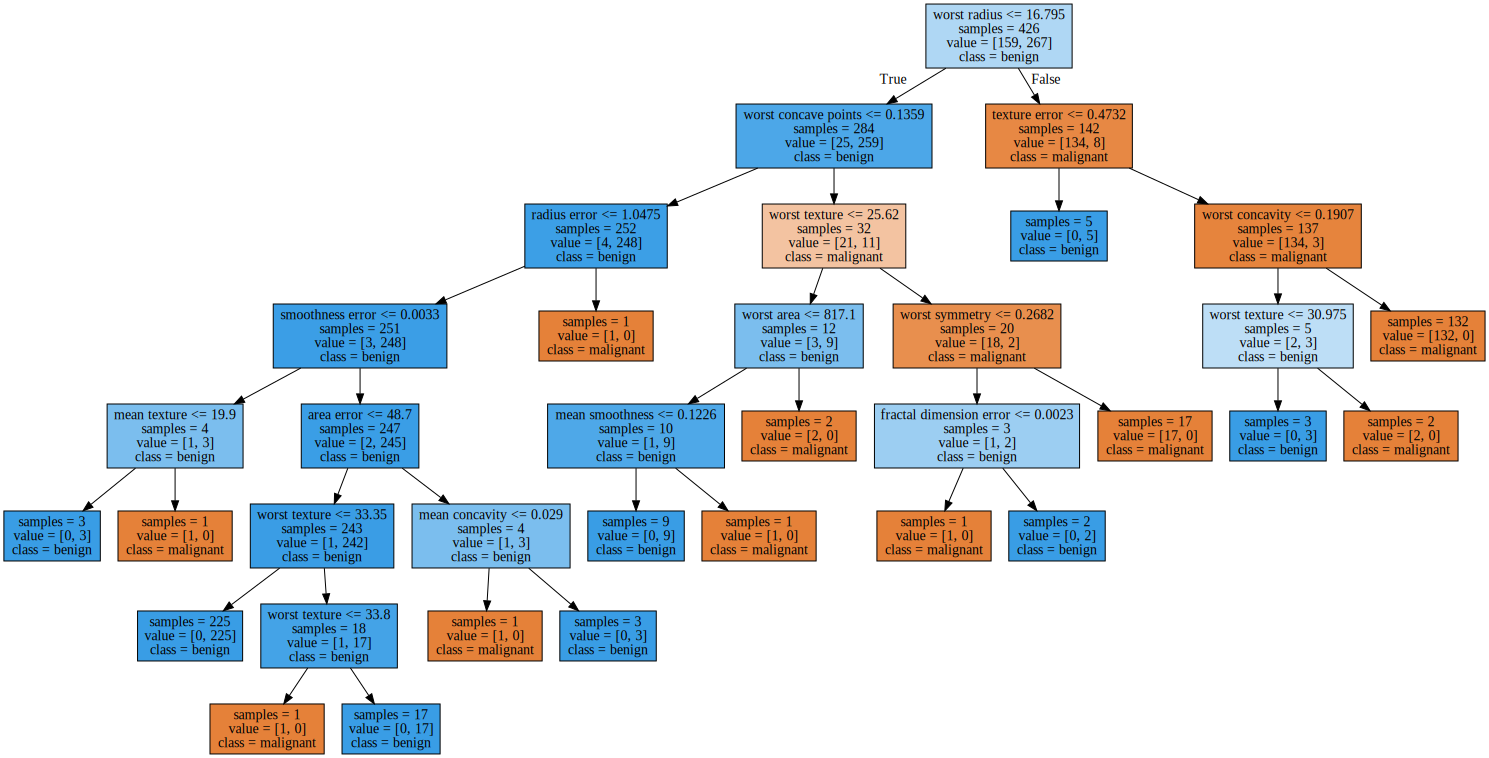

In [97]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

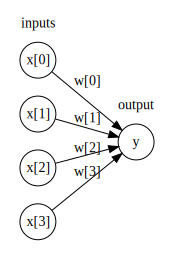

In [98]:
display(mglearn.plots.plot_logistic_regression_graph())

出力 y は入力特徴量 x[0]~x[3] と 係数 w[0]~w[3] によって決まる。

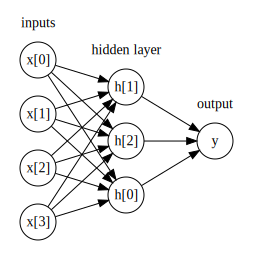

In [100]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 一連の重み付き和を計算することは、数学的には1つの重み付き和を計算することと同じ
- 線形モデルよりも強力にするために仕掛けが必要
  - relu(正規化線形関数), tanh(双極正接関数)
  - どちらもニューラルネットワークが線形モデルより複雑な関数を学習することを可能にする

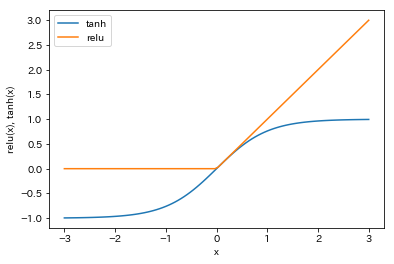

In [110]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")

plt.legend()
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

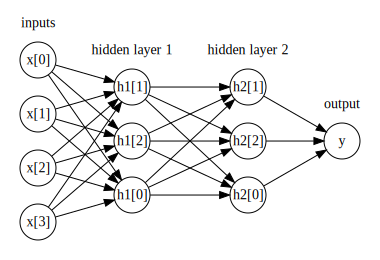

In [111]:
mglearn.plots.plot_two_hidden_layer_graph()

- x[0]~x[3]: 入力
- h1[0]~h1[2]: 隠れ層1
- h2[0]~h2[2]: 隠れ層2

隠れ層のノード数をどれくらいに設定するかが重要らしい。

### two_moons データ・セットに適用してMLPが動く様子を見てみる

In [114]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

mlp = 